In [9]:
import pandas as pd
data = pd.read_csv("jan23_prices.csv")
data.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,OPR_INTERVAL,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,MW,GROUP
0,2023-01-02T02:00:00-00:00,2023-01-02T03:00:00-00:00,2023-01-01,19,0,0096WD_7_N001,0096WD_7_N001,0096WD_7_N001,DAM,LMP,LMP_PRC,0096WD_7_N001,ALL,1,149.33041,1
1,2023-01-02T05:00:00-00:00,2023-01-02T06:00:00-00:00,2023-01-01,22,0,0096WD_7_N001,0096WD_7_N001,0096WD_7_N001,DAM,LMP,LMP_PRC,0096WD_7_N001,ALL,1,145.00000,1
2,2023-01-01T13:00:00-00:00,2023-01-01T14:00:00-00:00,2023-01-01,6,0,0096WD_7_N001,0096WD_7_N001,0096WD_7_N001,DAM,LMP,LMP_PRC,0096WD_7_N001,ALL,1,111.33543,1
3,2023-01-02T00:00:00-00:00,2023-01-02T01:00:00-00:00,2023-01-01,17,0,0096WD_7_N001,0096WD_7_N001,0096WD_7_N001,DAM,LMP,LMP_PRC,0096WD_7_N001,ALL,1,139.63030,1
4,2023-01-01T22:00:00-00:00,2023-01-01T23:00:00-00:00,2023-01-01,15,0,0096WD_7_N001,0096WD_7_N001,0096WD_7_N001,DAM,LMP,LMP_PRC,0096WD_7_N001,ALL,1,55.62719,1


In [10]:
# Convert date columns to datetime format
data['INTERVALSTARTTIME_GMT'] = pd.to_datetime(data['INTERVALSTARTTIME_GMT'])
data['INTERVALENDTIME_GMT'] = pd.to_datetime(data['INTERVALENDTIME_GMT'])

In [11]:
# Rename columns if necessary
data.rename(columns={'OPR_DT': 'Operation_Date', 'OPR_HR': 'Operation_Hour', 'MW': 'Price_MWh'}, inplace=True)


In [12]:

# Extract date components
data['Year'] = data['INTERVALSTARTTIME_GMT'].dt.year
data['Month'] = data['INTERVALSTARTTIME_GMT'].dt.month
data['Day'] = data['INTERVALSTARTTIME_GMT'].dt.day
data['Hour'] = data['INTERVALSTARTTIME_GMT'].dt.hour

In [13]:
# Example of a rolling average
data['Rolling_Avg_Price'] = data['Price_MWh'].rolling(window=24).mean()

In [14]:
# Daily average prices
daily_avg_prices = data.groupby(data['INTERVALSTARTTIME_GMT'].dt.date)['Price_MWh'].mean().reset_index()
daily_avg_prices.rename(columns={'Price_MWh': 'Daily_Avg_Price'}, inplace=True)

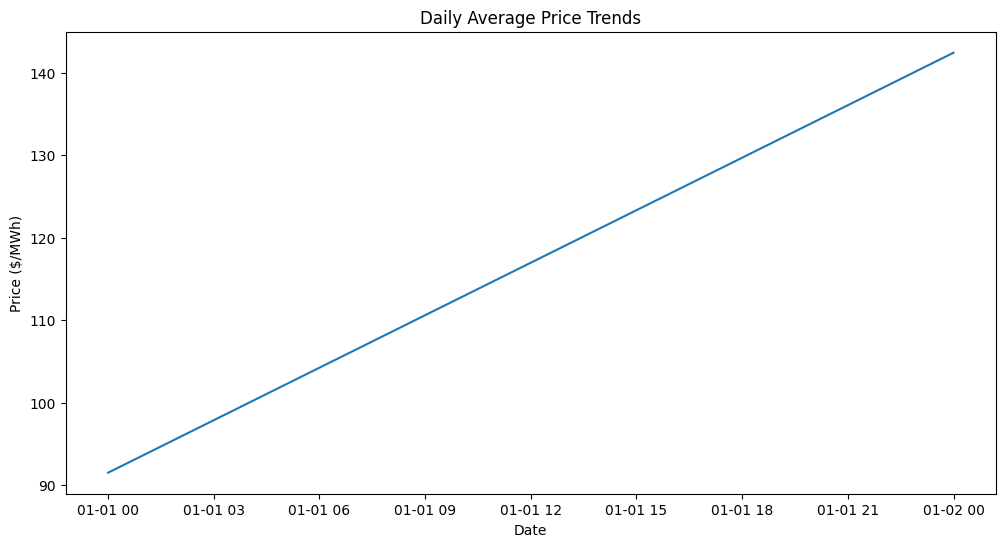

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot of daily average prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='INTERVALSTARTTIME_GMT', y='Daily_Avg_Price', data=daily_avg_prices)
plt.title('Daily Average Price Trends')
plt.xlabel('Date')
plt.ylabel('Price ($/MWh)')
plt.show()